In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

import pandas as pd

Ejemplo campo aleatorio bivariado

In [35]:
from implementations import K, matern_model, rho_matern, generar_grilla

In [69]:
theta_1, theta_2 = 15, 20
theta_12 = min(theta_1, theta_2)

nu_1, nu_2 = 1/2, 5/2
nu_12 = (nu_1 + nu_2)/2

rho_12 = rho_matern(2, nu_1, nu_2, nu_12, theta_1, theta_2, theta_12)

X_1 = X_2 = generar_grilla(25, 1)

sigma = K(X_1, X_2, matern_model(theta_1, nu_1), matern_model(theta_2, nu_2), matern_model(theta_12, nu_12), rho_12)

Y = Y = np.linalg.cholesky(sigma) @ np.random.RandomState(42).normal(0, 1, 2*625)
Y_1, Y_2 = Y[:625], Y[625:]

rho_12

0.5590169943749475

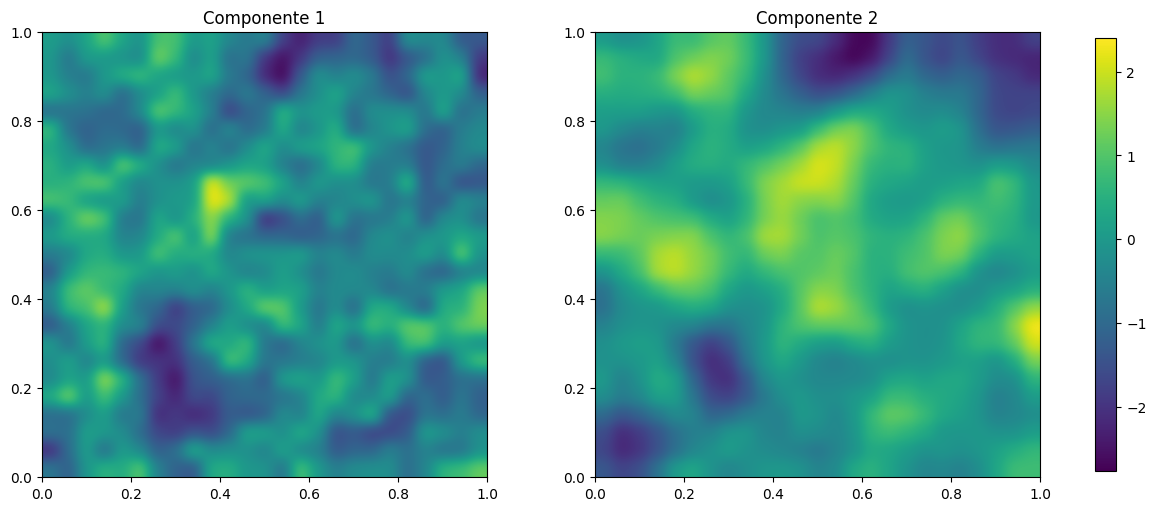

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

ax1.imshow(Y_1.reshape((25,25)), extent=[0,1,0,1], interpolation='Gaussian')
ax1.set_title("Componente 1")

c2 = ax2.imshow(Y_2.reshape((25,25)), extent=[0,1,0,1], interpolation='Gaussian')
ax2.set_title("Componente 2")

fig.colorbar(c2, ax=[ax1, ax2], orientation='vertical', fraction=0.02, pad=0.04)
fig.savefig('ejemplo_campo_bivariado.png', dpi=200)
plt.show()

Ejemplo submodelos

In [111]:
from implementations import gen_observation_points, gen_As

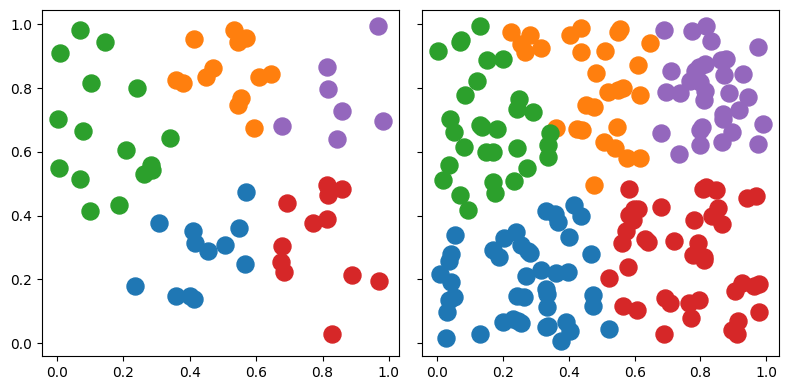

In [168]:
n_1 = 60
n_2 = 180

X_1 = gen_observation_points(2, n_1, 1)
X_2 = gen_observation_points(2, n_2, 1)

K = 5

A_1, A_2 = gen_As(X_1, X_2, K)

fig, axs = plt.subplots(1,2,figsize=(8,4),sharey=True)

for l, j in zip(A_1, A_2):
    axs[0].scatter(X_1[l,0], X_1[l,1], s=150)
    axs[1].scatter(X_2[j,0], X_2[j,1], s=150)
fig.tight_layout()
fig.savefig('ejemplo_submodelos.png', dpi=200)

Resultados

In [2]:
def boxplots_1(data, ax, title=''):
    sns.boxplot(data=data[data['METHOD'] == 'coK'], 
                x='METHOD', y='RMSE', width=0.2, linecolor='k', 
                boxprops={"facecolor": 'gray'}, zorder=2, ax=ax)

    sns.boxplot(data=data[data['METHOD'] != 'coK'],
                x='METHOD', y='RMSE', hue='N', width=0.8,
                palette=sns.color_palette("Blues", 5), linecolor='k',
                zorder=2, ax=ax)

    ax.axhline(data[data['METHOD'] == 'coK']['RMSE'].median(), ls='--', c='r', lw=2)
    ax.grid(axis='y', zorder=1)
    ax.legend_.remove(); 
    
    ax.set_ylabel('')
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='both', labelsize=12)
    
    ax.set_title(title, fontsize=15);

def boxplots_2(data, title='', n=5_000, width_cok=0.2, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=data[data['N'] == n], 
                x='METHOD', y='RMSE', width=width_cok, linecolor='k', 
                boxprops={"facecolor": 'gray'}, zorder=2, ax=plt.gca())

    sns.boxplot(data=data[data['N'] != n],
                x='N', y='RMSE', hue='METHOD', width=0.6,
                palette='pastel', linecolor='k',
                zorder=2, ax=plt.gca())

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='METHOD')
    plt.xlabel('N')
    plt.title(title)
    plt.axhline(data[data['METHOD'] == 'coK']['RMSE'].median(), ls='--', c='r', lw=1)
    plt.grid(axis='y', zorder=1);

In [3]:
import matplotlib.patches as mpatches
legend_elements_1 = [
    mpatches.Patch(facecolor='gray', edgecolor='k', label='coK'),
    mpatches.Patch(facecolor=sns.color_palette("Blues", 5)[0], edgecolor='k', label='5'),
    mpatches.Patch(facecolor=sns.color_palette("Blues", 5)[1], edgecolor='k', label='10'),
    mpatches.Patch(facecolor=sns.color_palette("Blues", 5)[2], edgecolor='k', label='100'),
    mpatches.Patch(facecolor=sns.color_palette("Blues", 5)[3], edgecolor='k', label='500'),
    mpatches.Patch(facecolor=sns.color_palette("Blues", 5)[4], edgecolor='k', label='1000'),
]

# $d=2$

In [4]:
d = 2

In [5]:
data = pd.read_csv(f'results_experiments_d_{d}.csv', sep=';')

data[['nu_1', 'nu_2']] = data[['nu_1', 'nu_2']].replace({0.5:'1/2', 2.5:'5/2'})
data['theta_2'] = data['theta_2'].replace({5.0:'5'})
data.head()

,METHOD,N,K,TIME,RMSE,n,nu_1,nu_2,theta_1,theta_2
0,coKNN,1000,5,26.750026,0.139021,5000,1/2,1/2,2,2.5
1,NcoK KM,1000,5,55.702301,0.139240,5000,1/2,1/2,2,2.5
2,NcoK KM+,1000,5,53.782467,0.137827,5000,1/2,1/2,2,2.5
3,coKNN,500,10,6.044639,0.139017,5000,1/2,1/2,2,2.5
4,NcoK KM,500,10,28.900970,0.138943,5000,1/2,1/2,2,2.5


In [6]:
groups = data.groupby(by=['n', 'nu_1', 'nu_2', 'theta_1', 'theta_2'])

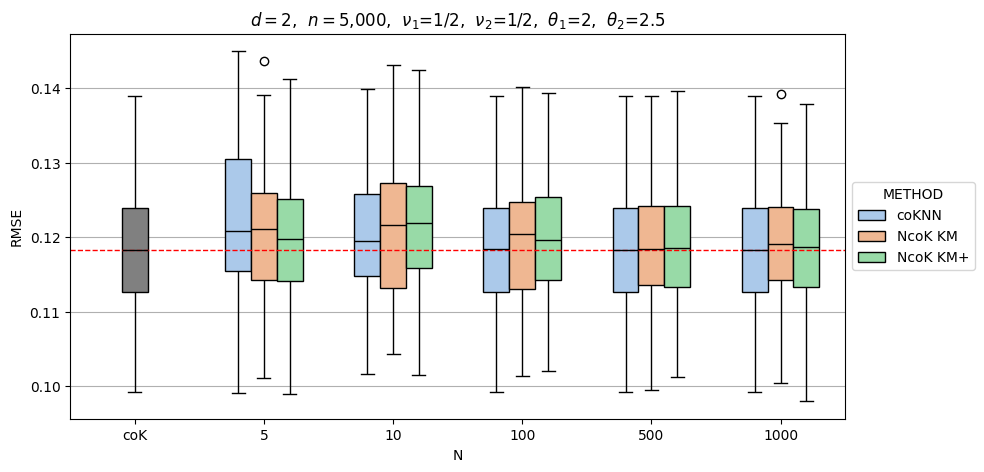

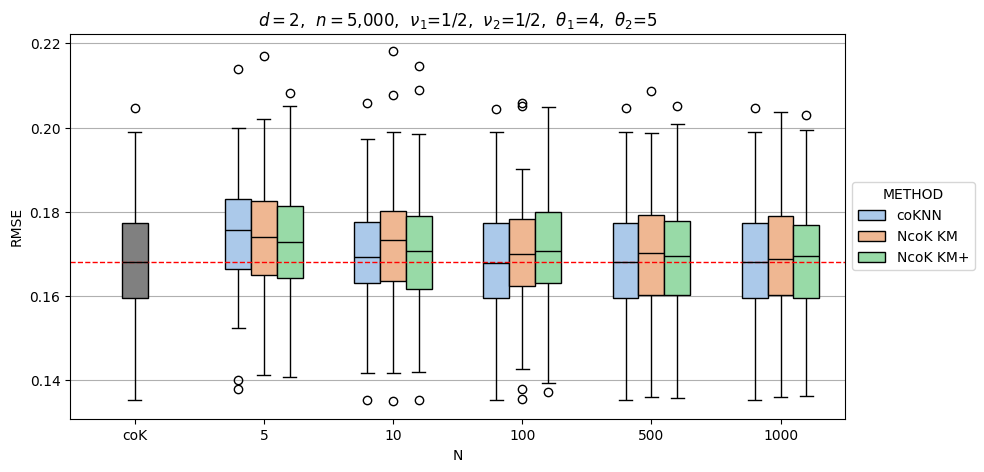

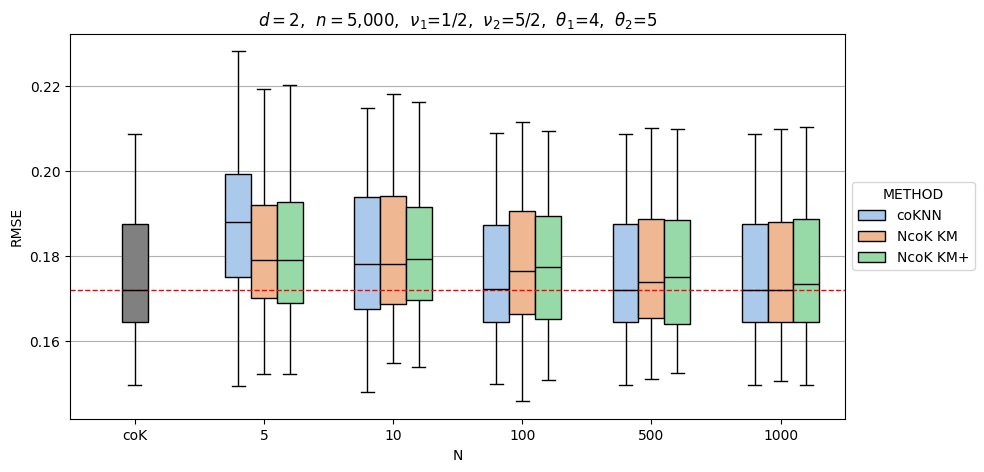

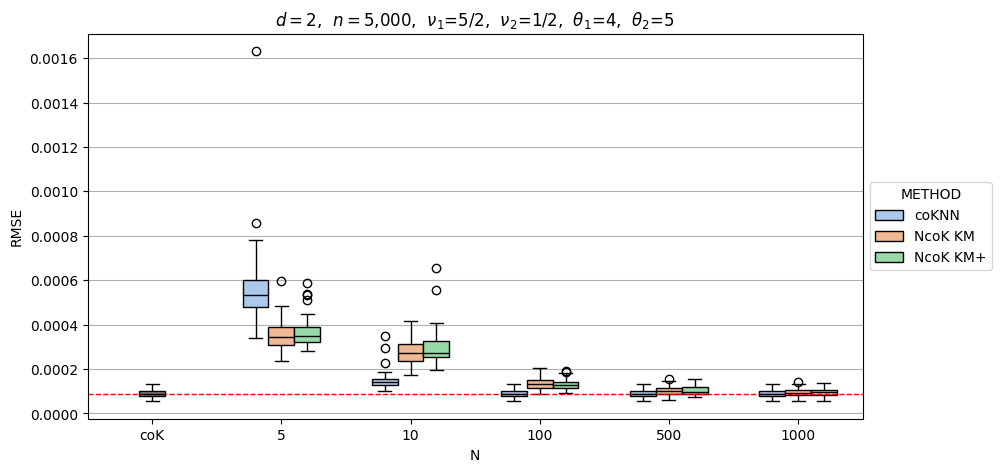

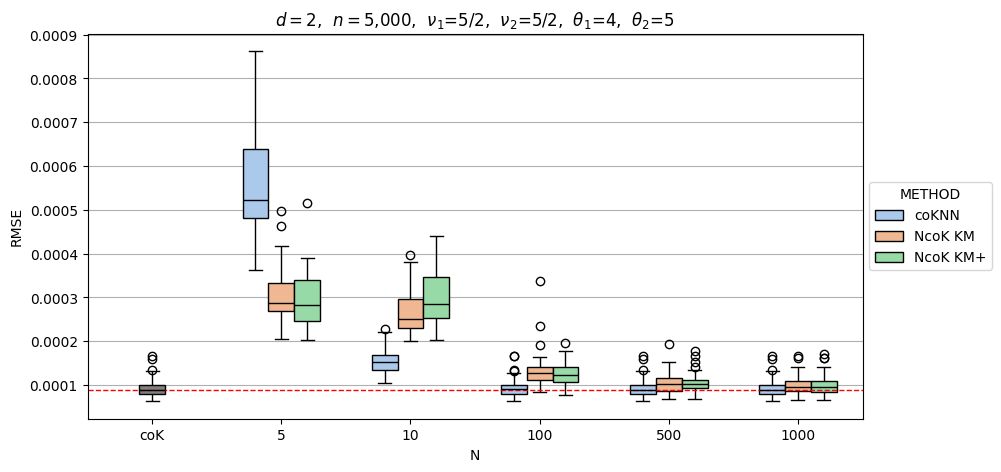

In [152]:
for key, group in groups:
    title = f'$d={d}$,  $n=${key[0]:,.0f},  $\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_2(group, title)
    # break

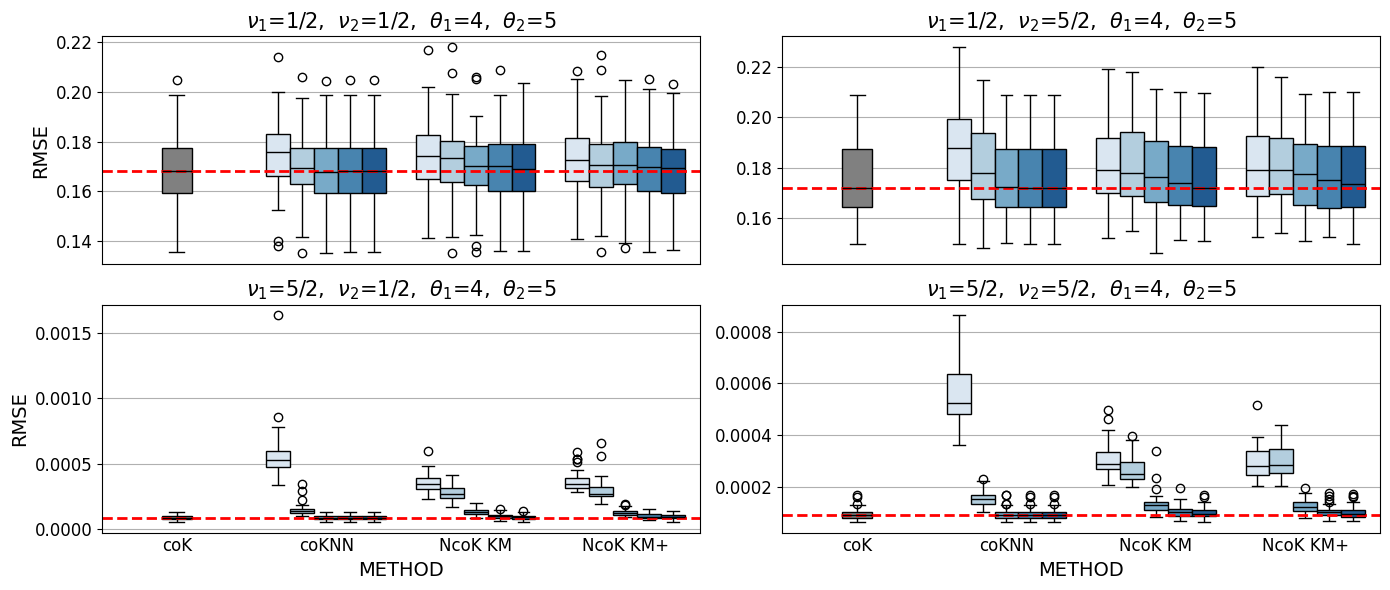

In [8]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(14,6))

for i, (key, group) in enumerate(groups):
    if i == 0:
        continue
    ax = axs.flatten()[i - 1]
    title = f'$\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_1(group, ax, title)
    if i in [1,3]:
        ax.set_ylabel('RMSE', fontsize=14)
    if i in [3,4]:
        ax.set_xlabel('METHOD', fontsize=14)
fig.tight_layout()
fig.savefig(f'boxplots_{d}_1.png', dpi=200, bbox_inches='tight')

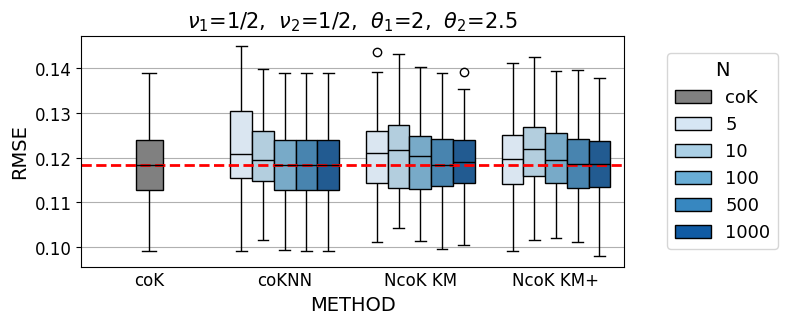

In [12]:
plt.figure(figsize=(7,3))
for i, (key, group) in enumerate(groups):
    title = f'$\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_1(group, plt.gca(), title)
    plt.ylabel('RMSE', fontsize=14)
    plt.xlabel('METHOD', fontsize=14)
    break

plt.legend(handles=legend_elements_1, loc='center right', 
           title='N', bbox_to_anchor=(1.3, 0.5),
           fontsize=13, title_fontsize=14
           )

plt.savefig(f'boxplots_{d}_2.png', dpi=200, bbox_inches='tight')

## Asymmetric

In [2]:
df = pd.read_csv('results_asymmetric.csv', sep=';')
groups = df.groupby(by='a')

In [3]:
def boxplots_2(data, ax, title='', n=5_000, width_cok=0.2):
    sns.boxplot(data=data[data['N'] == n], 
                x='METHOD', y='RMSE', width=width_cok, linecolor='k', 
                boxprops={"facecolor": 'gray'}, zorder=2, ax=ax)

    sns.boxplot(data=data[data['N'] != n],
                x='N', y='RMSE', hue='METHOD', width=0.6,
                palette='pastel', linecolor='k',
                zorder=2, ax=ax)
    
    ax.axhline(data[data['METHOD'] == 'coK']['RMSE'].median(), ls='--', c='r', lw=2)
    ax.grid(axis='y', zorder=1)
    ax.legend_.remove(); ax.set_ylabel('')
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_title(title, fontsize=15);

In [4]:
import matplotlib.patches as mpatches
legend_elements_asymmetric = [
    mpatches.Patch(facecolor='gray', edgecolor='k', label='coK'),
    mpatches.Patch(facecolor=sns.color_palette('pastel')[0], edgecolor='k', label='coKNN'),
    mpatches.Patch(facecolor=sns.color_palette('pastel')[1], edgecolor='k', label='NcoK'),
]

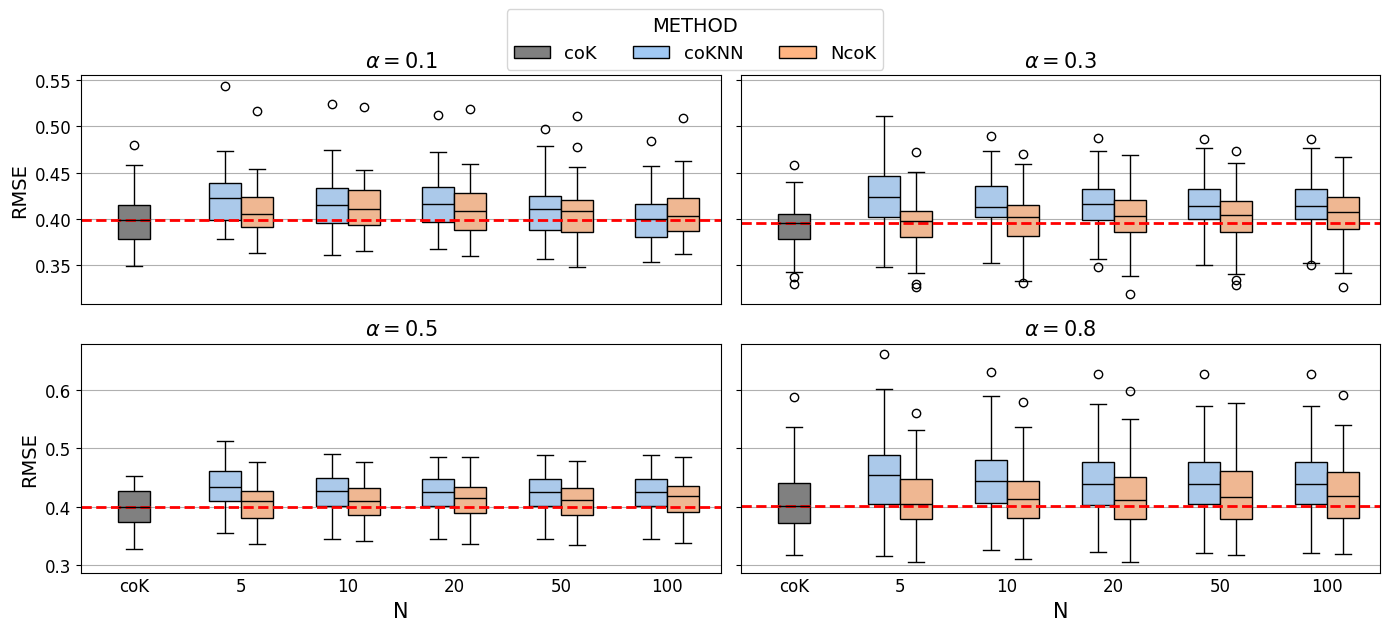

In [13]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(14,6))
for i, ((key, group), ax) in enumerate(zip(groups, axs.flatten()), 1):
    a_x = float(key[2:4])
    title = fr'$\alpha={a_x}$'
    boxplots_2(group, ax, title, n=1_000, width_cok=0.3)
    if i in [3,4]:
        ax.set_xlabel('N', fontsize=15)
    if i in [1,3]:
        ax.set_ylabel('RMSE', fontsize=14)

fig.legend(handles=legend_elements_asymmetric, loc='upper center', title='METHOD', 
           ncol=len(legend_elements_asymmetric), bbox_to_anchor=(0.5, 1.06),
           fontsize=13, title_fontsize=14
           )
fig.tight_layout()
# fig.savefig('boxplot_asymmetric.png', dpi=200, bbox_inches='tight')

# $d=3$

In [17]:
d = 3

In [18]:
data = pd.read_csv(f'results_experiments_d_{d}.csv', sep=';')

data[['nu_1', 'nu_2']] = data[['nu_1', 'nu_2']].replace({0.5:'1/2', 2.5:'5/2'})
data['theta_1'] = data['theta_1'].replace({2.0:'2', 4.0:'4'})
data['theta_2'] = data['theta_2'].replace({5.0:'5'})
data.head()

,METHOD,N,K,TIME,RMSE,n,nu_1,nu_2,theta_1,theta_2
0,coKNN,1000,5,21.629719,0.270550,5000.0,1/2,1/2,2,2.5
1,NcoK KM,1000,5,64.293552,0.273641,5000.0,1/2,1/2,2,2.5
2,NcoK KM+,1000,5,137.734451,0.276366,5000.0,1/2,1/2,2,2.5
3,coKNN,500,10,22.283544,0.270611,5000.0,1/2,1/2,2,2.5
4,NcoK KM,500,10,123.049370,0.272795,5000.0,1/2,1/2,2,2.5


In [19]:
groups = data.groupby(by=['n', 'nu_1', 'nu_2', 'theta_1', 'theta_2'])

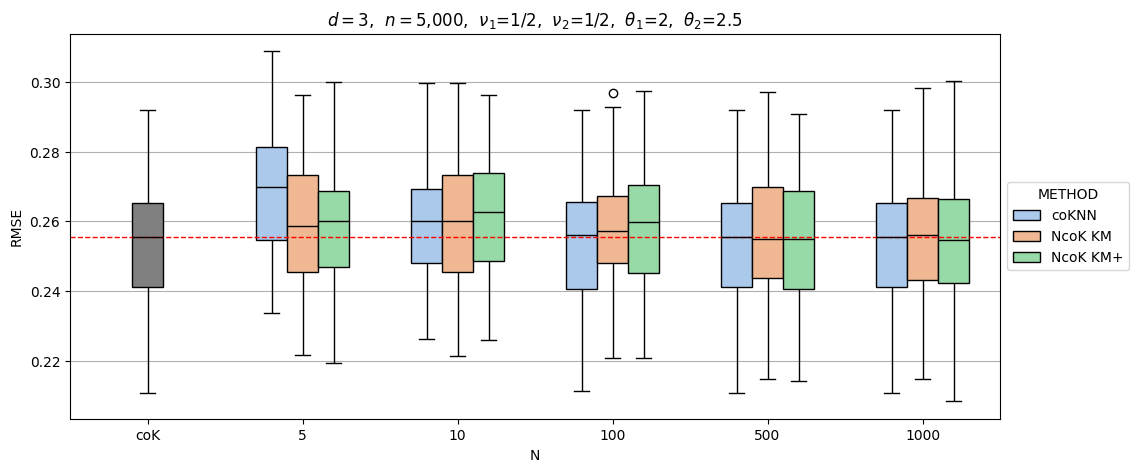

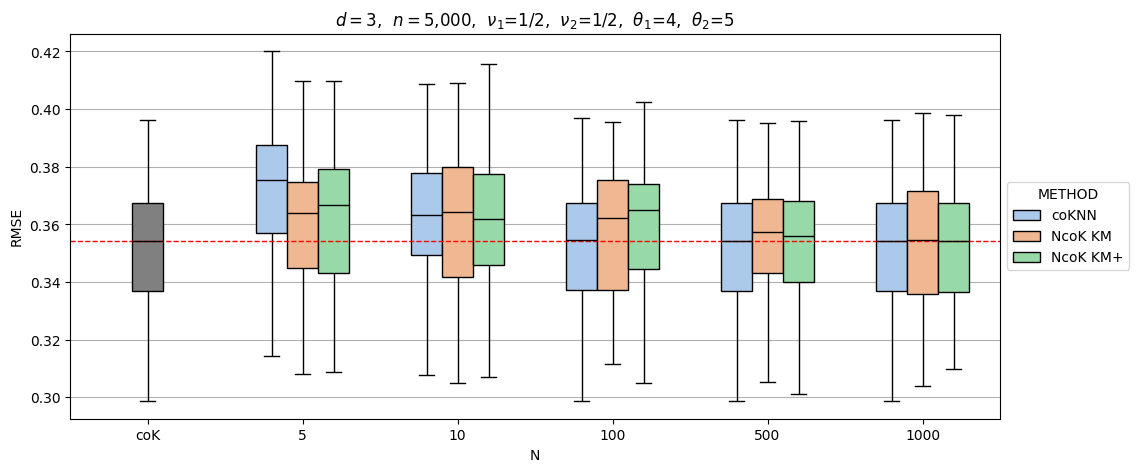

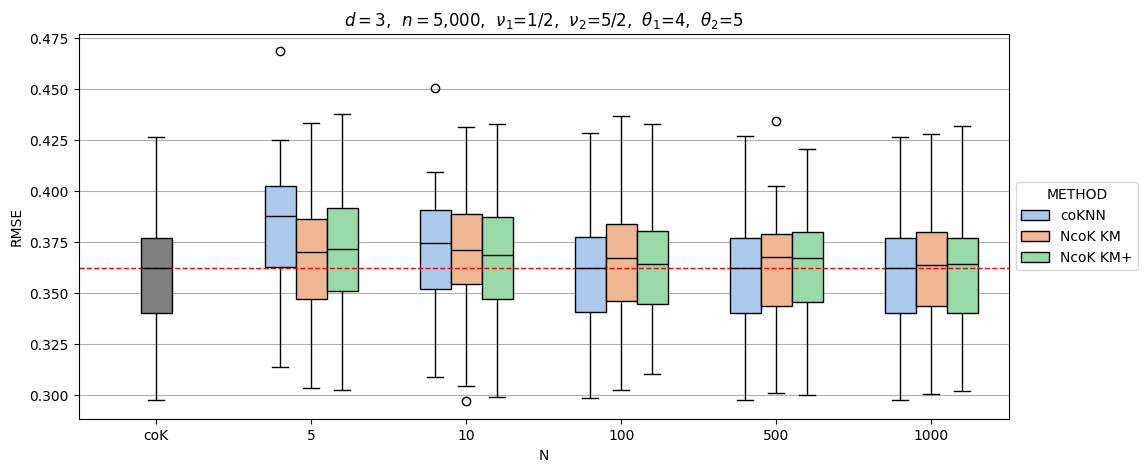

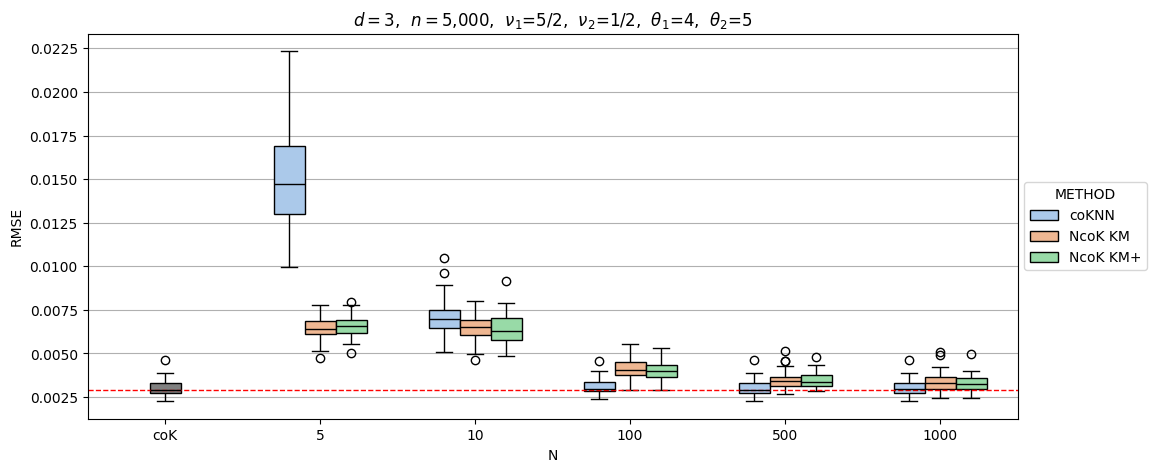

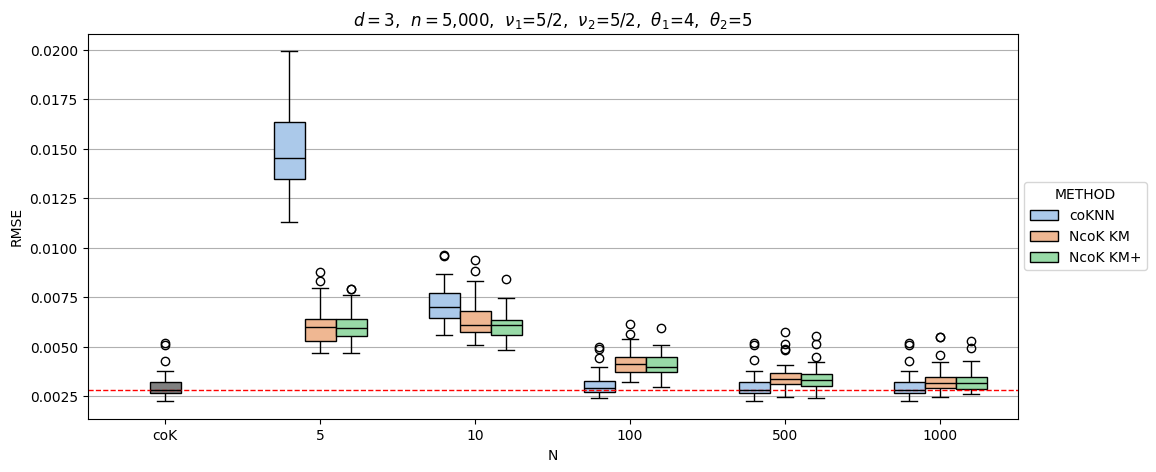

In [13]:
for key, group in groups:
    title = f'$d={d}$,  $n=${key[0]:,.0f},  $\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_2(group, title)
    # break

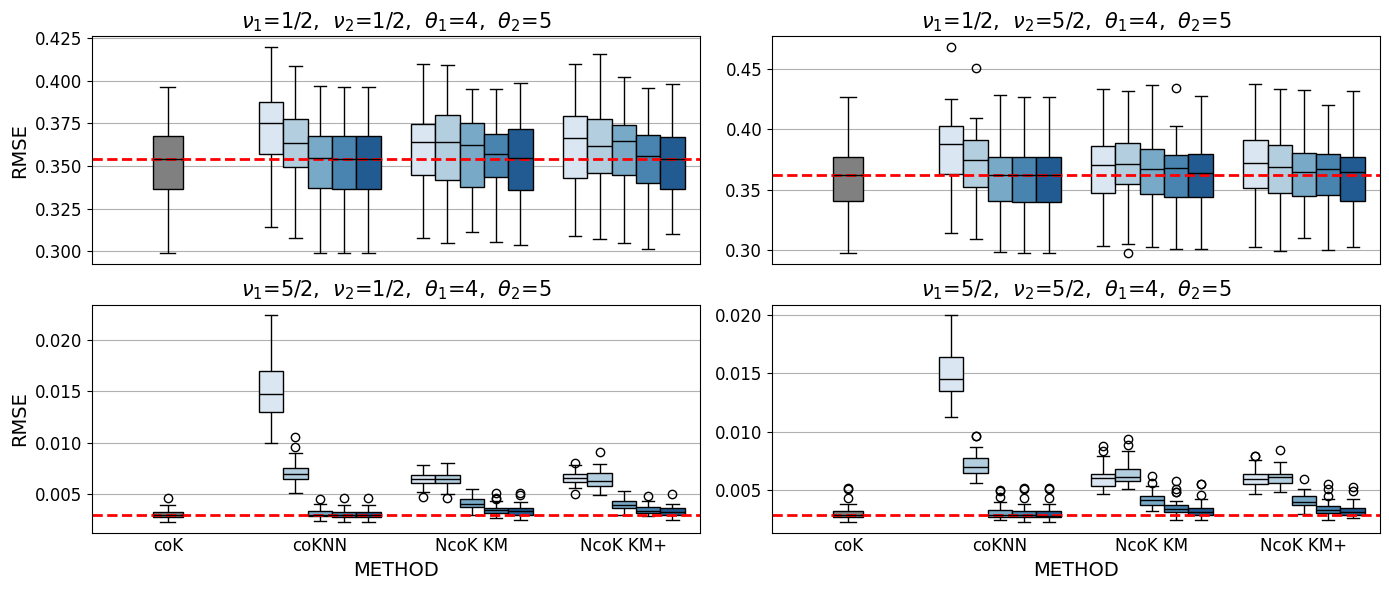

In [20]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(14,6))

for i, (key, group) in enumerate(groups):
    if i == 0:
        continue
    ax = axs.flatten()[i - 1]
    title = f'$\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_1(group, ax, title)
    if i in [1,3]:
        ax.set_ylabel('RMSE', fontsize=14)
    if i in [3,4]:
        ax.set_xlabel('METHOD', fontsize=14)
fig.tight_layout()
fig.savefig(f'boxplots_{d}_1.png', dpi=200, bbox_inches='tight')

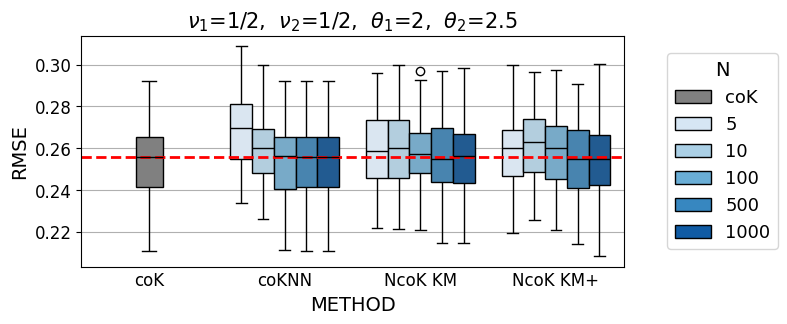

In [21]:
plt.figure(figsize=(7,3))
for i, (key, group) in enumerate(groups):
    title = f'$\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_1(group, plt.gca(), title)
    plt.ylabel('RMSE', fontsize=14)
    plt.xlabel('METHOD', fontsize=14)
    break

plt.legend(handles=legend_elements_1, loc='center right', 
           title='N', bbox_to_anchor=(1.3, 0.5),
           fontsize=13, title_fontsize=14
           )

plt.savefig(f'boxplots_{d}_2.png', dpi=200, bbox_inches='tight')

# Application

In [55]:
summary = pd.read_csv('results_application_summary.csv', sep=';')
summary.sort_values('rmse').head(20)

,sym,nu,m,time_gen_blocks,time_predict,rmse
9,False,1.5,75,0.094779,3218.469278,0.015598
11,False,1.5,175,0.182486,4293.904642,0.018024
6,True,1.5,75,0.099093,3111.274213,0.019213
10,False,1.5,125,0.145766,3767.516148,0.020557
8,True,1.5,175,0.183058,4281.819076,0.021341
7,True,1.5,125,0.160282,3687.551240,0.024687
3,False,0.5,75,0.094423,3192.431018,0.037347
0,True,0.5,75,0.213484,3461.588563,0.037942
5,False,0.5,175,0.183094,4178.570659,0.040666
2,True,0.5,175,0.199658,4514.798156,0.041822


In [56]:
summary.sort_values('time_predict').head(20)

,sym,nu,m,time_gen_blocks,time_predict,rmse
6,True,1.5,75,0.099093,3111.274213,0.019213
3,False,0.5,75,0.094423,3192.431018,0.037347
9,False,1.5,75,0.094779,3218.469278,0.015598
0,True,0.5,75,0.213484,3461.588563,0.037942
4,False,0.5,125,0.161259,3630.286179,0.044711
7,True,1.5,125,0.160282,3687.551240,0.024687
1,True,0.5,125,0.169168,3767.465779,0.045621
10,False,1.5,125,0.145766,3767.516148,0.020557
5,False,0.5,175,0.183094,4178.570659,0.040666
8,True,1.5,175,0.183058,4281.819076,0.021341


In [57]:
summary.sort_values('time_gen_blocks').head(20)

,sym,nu,m,time_gen_blocks,time_predict,rmse
3,False,0.5,75,0.094423,3192.431018,0.037347
9,False,1.5,75,0.094779,3218.469278,0.015598
6,True,1.5,75,0.099093,3111.274213,0.019213
10,False,1.5,125,0.145766,3767.516148,0.020557
7,True,1.5,125,0.160282,3687.551240,0.024687
4,False,0.5,125,0.161259,3630.286179,0.044711
1,True,0.5,125,0.169168,3767.465779,0.045621
11,False,1.5,175,0.182486,4293.904642,0.018024
8,True,1.5,175,0.183058,4281.819076,0.021341
5,False,0.5,175,0.183094,4178.570659,0.040666


In [58]:
preds = pd.read_csv('results_application_predictions.csv', sep=';')

In [59]:
from sklearn.metrics import root_mean_squared_error

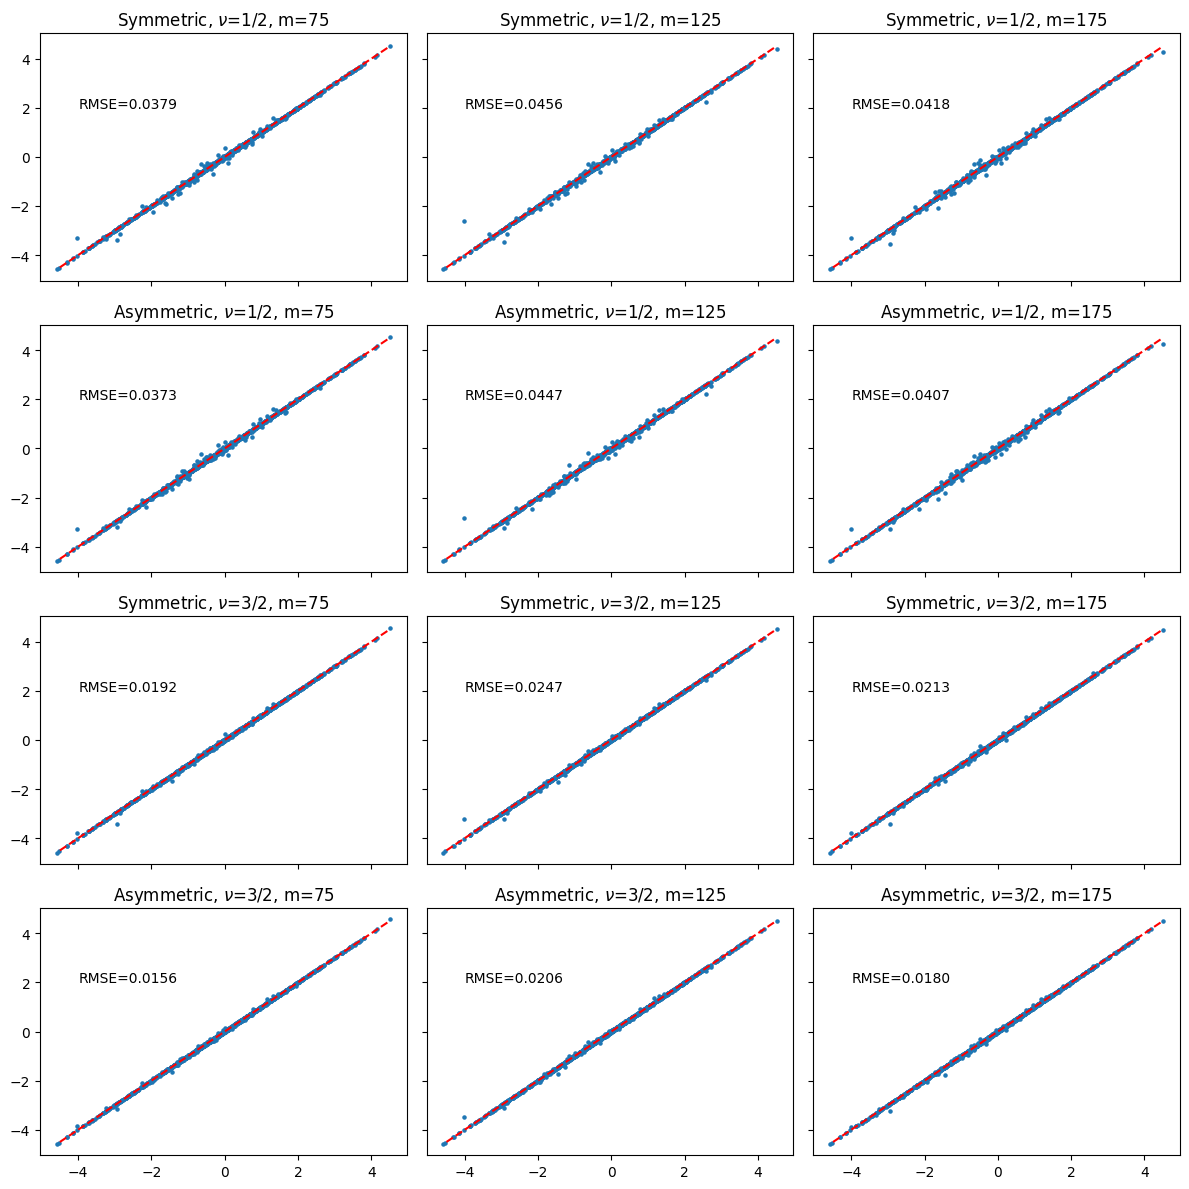

In [60]:
fig, axs = plt.subplots(4,3,figsize=(12,12),sharex=True,sharey=True)

for name, ax in zip(preds.columns[1:], axs.flatten()):
    sym, nu, m = name.split('_')
    ax.scatter(preds['Y_true'], preds[name], s=5)
    ax.set_title(fr'{'Symmetric' if sym=='True' else 'Asymmetric'}, $\nu$={'1/2' if nu=='0.5' else '3/2'}, m={m}')
    ax.plot([-4.5, 4.5], [-4.5, 4.5], 'r--')
    ax.text(-4,2,f'RMSE={root_mean_squared_error(preds['Y_true'], preds[name]):.4f}')
fig.tight_layout()

In [61]:
X = pd.read_csv('data.txt', sep=' ').loc[pd.read_csv('index.txt', sep=' ')['x'].values-1, ['x', 'y']].values

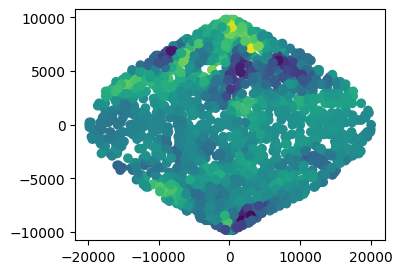

In [62]:
plt.figure(figsize=(4,3))
plt.scatter(X[:,0], X[:,1], c=preds['Y_true']);

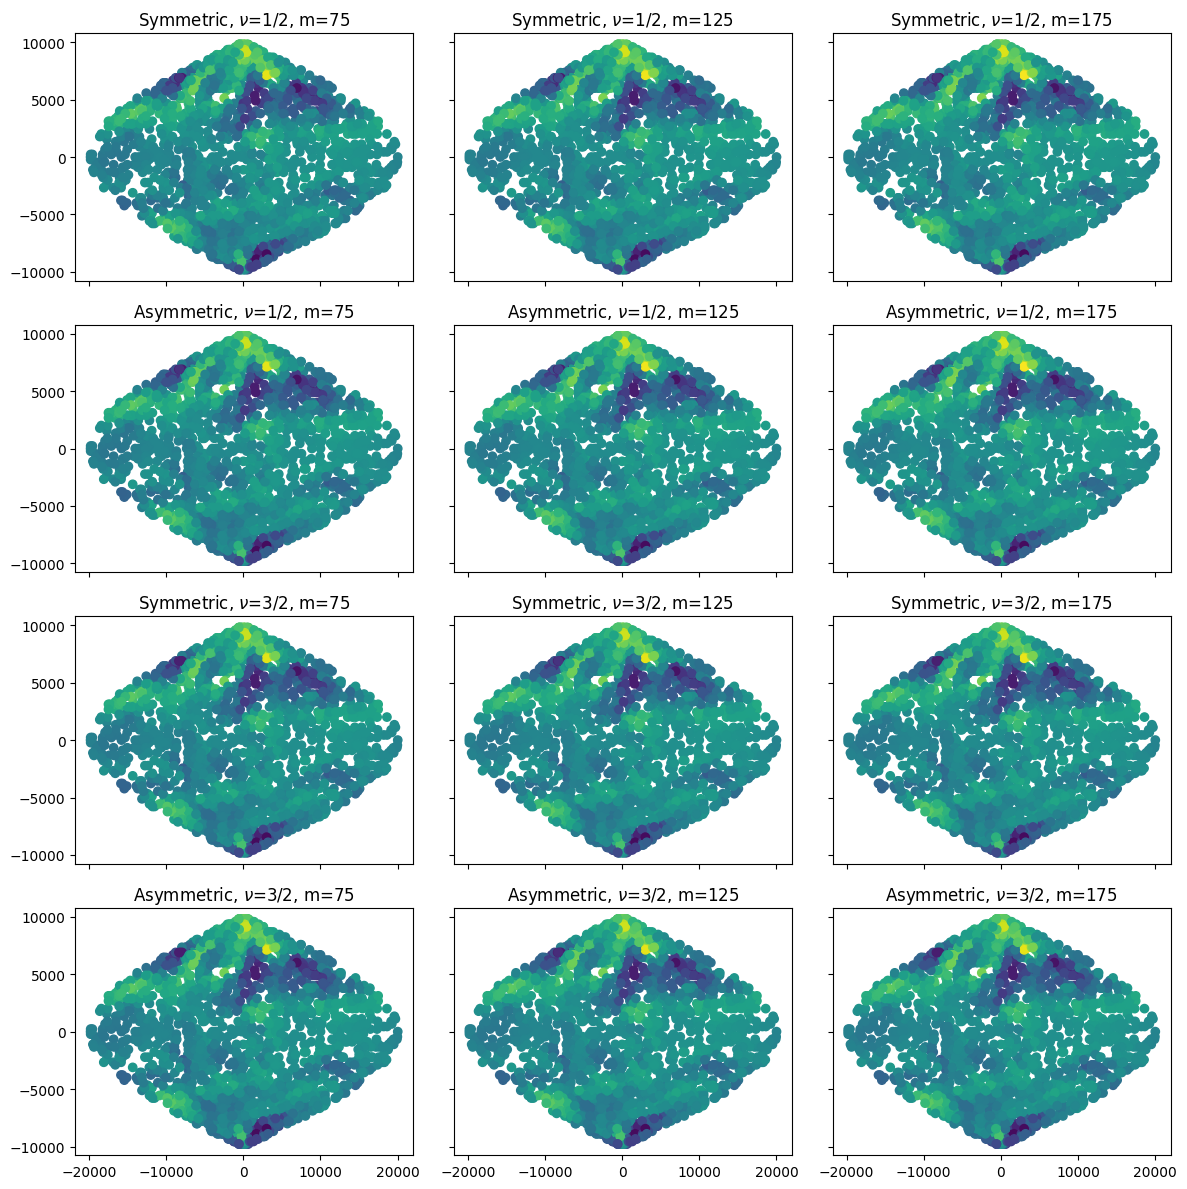

In [63]:
fig, axs = plt.subplots(4,3,figsize=(12,12),sharex=True,sharey=True)

for name, ax in zip(preds.columns[1:], axs.flatten()):
    sym, nu, m = name.split('_')
    ax.scatter(X[:,0], X[:,1], c=preds[name])
    ax.set_title(fr'{'Symmetric' if sym=='True' else 'Asymmetric'}, $\nu$={'1/2' if nu=='0.5' else '3/2'}, m={m}')
fig.tight_layout()

In [64]:
import matplotlib.colors as mcolors

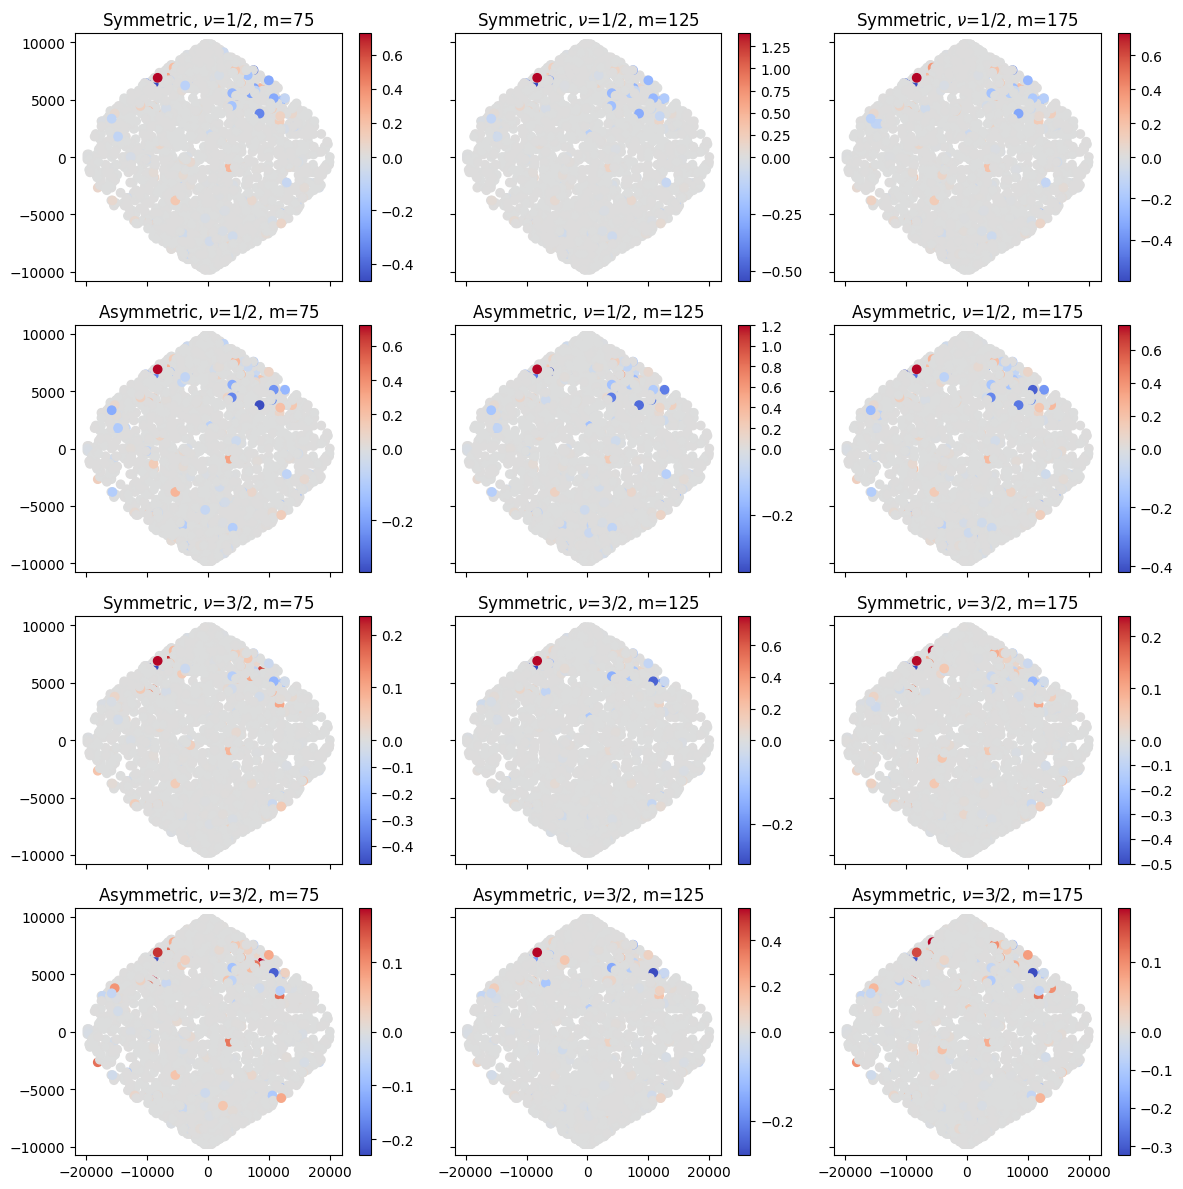

In [65]:
fig, axs = plt.subplots(4,3,figsize=(12,12),sharex=True,sharey=True)

for name, ax in zip(preds.columns[1:], axs.flatten()):
    sym, nu, m = name.split('_')
    diff = preds[name]-preds['Y_true']
    norm = mcolors.TwoSlopeNorm(vmin=diff.min(), vmax=diff.max(), vcenter=0)
    sc = ax.scatter(X[:,0], X[:,1], c=diff, cmap='coolwarm', norm=norm)
    ax.set_title(fr'{'Symmetric' if sym=='True' else 'Asymmetric'}, $\nu$={'1/2' if nu=='0.5' else '3/2'}, m={m}')
    fig.colorbar(sc, ax=ax)
fig.tight_layout()